In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from sklearn import metrics
import datetime as dt
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

from xgboost import XGBClassifier, plot_importance

import seaborn as sns

import plotly.offline as pyoff
import plotly.graph_objs as go
import plotly.io as pio

import matplotlib.pyplot as plt

In [13]:
df_user_all_info_agg_for_model=pd.read_csv("df_user_log__transfer__membership__aggregated_per_user__training_members.csv")
df_user_all_info_agg_for_model=df_user_all_info_agg_for_model.drop(columns=["Unnamed: 0"])

for col in df_user_all_info_agg_for_model.columns:
    print(col,'na/dtype',df_user_all_info_agg_for_model[col].isna().sum(),df_user_all_info_agg_for_model[col].dtype)
df_user_all_info_agg_for_model

msno na/dtype 0 object
city na/dtype 0 int64
bd na/dtype 0 int64
gender na/dtype 467907 object
registered_via na/dtype 0 int64
registration_init_time na/dtype 0 int64
registration_init_time_as_dt na/dtype 0 object
activity_duration na/dtype 0 int64
last_date_active na/dtype 0 object
n_active_days na/dtype 0 int64
sum_num_25 na/dtype 0 int64
sum_num_50 na/dtype 0 int64
sum_num_75 na/dtype 0 int64
sum_num_985 na/dtype 0 int64
sum_num_100 na/dtype 0 int64
sum_num_unq na/dtype 0 int64
tot_secs na/dtype 0 float64
mean_num_25 na/dtype 0 float64
median_num_25 na/dtype 0 float64
q25_num_25 na/dtype 0 float64
q75_num_25 na/dtype 0 float64
std_num_25 na/dtype 9331 float64
median_num_50 na/dtype 0 float64
std_num_50 na/dtype 9331 float64
median_num_75 na/dtype 0 float64
std_num_75 na/dtype 9331 float64
median_num_985 na/dtype 0 float64
std_num_985 na/dtype 9331 float64
mean_num_100 na/dtype 0 float64
median_num_100 na/dtype 0 float64
q25_num_100 na/dtype 0 float64
q75_num_100 na/dtype 0 float64
s

,msno,city,bd,gender,registered_via,registration_init_time,registration_init_time_as_dt,activity_duration,last_date_active,n_active_days,...,mode_delta_trans_date,min_delta_amount_paid,max_delta_amount_paid,mode_delta_amount_paid,duration_max_memb_exp_min_trans_date_effective,first_cancel_membership_expire_date,last_cancel_membership_expire_date,first_auto_renew_transaction,last_auto_renew_transaction,is_churn
0,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0,NaN,7,20110914,2011-09-14,820,2017-03-31,763,...,31.0,-20.0,20.0,0.0,846.0,2016-11-28,2016-11-28,2015-01-03,2017-03-27,0
1,yLkV2gbZ4GLFwqTOXLVHz0VGrMYcgBGgKZ3kj9RiYu8=,4,30,male,9,20110916,2011-09-16,781,2017-03-31,18,...,31.0,0.0,0.0,0.0,672.0,NaN,NaN,2015-02-17,2017-03-31,0
2,I0yFvqMoNkM8ZNHb617e1RBzIS/YRKemHO7Wj13EtA0=,13,63,male,9,20110918,2011-09-18,817,2017-03-30,354,...,31.0,0.0,0.0,0.0,820.0,NaN,NaN,2015-01-27,2017-03-27,0
3,OoDwiKZM+ZGr9P3fRivavgOtglTEaNfWJO4KaJcTTts=,1,0,NaN,7,20110918,2011-09-18,817,2017-03-28,295,...,31.0,0.0,0.0,0.0,822.0,NaN,NaN,2015-01-26,2017-03-26,1
4,4De1jAxNRABoyRBDZ82U0yEmzYkqeOugRGVNIf92Xb8=,4,28,female,9,20110920,2011-09-20,761,2017-03-31,37,...,31.0,0.0,31.0,0.0,274.0,2015-06-07,2015-06-07,2015-03-31,2017-03-03,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855131,dz8iQV2eZCBZo1DjKL7OifsiyzGf3xyMaCFDOJHVeyc=,1,0,NaN,7,20151020,2015-10-20,528,2017-03-31,108,...,31.0,0.0,0.0,0.0,547.0,NaN,NaN,2015-10-20,2017-03-19,0
855132,OL6joplCKThE1pZD+AQDnj3kZiC45qzpndlDIRSyPQI=,1,0,NaN,7,20151020,2015-10-20,528,2017-03-31,396,...,31.0,0.0,0.0,0.0,548.0,NaN,NaN,2015-10-20,2017-03-20,0
855133,O11rAa17ANM6DGMMVb9L2vwCQFv/S6SR3SDB1nGuOAc=,1,0,NaN,7,20151020,2015-10-20,525,2017-03-31,273,...,31.0,0.0,0.0,0.0,548.0,NaN,NaN,2015-10-20,2017-03-20,0
855134,tyoRqQ72Y2oCcqvdaIxG8T0Hs9DZvuuM8IeTwhxtdBQ=,6,26,female,7,20151020,2015-10-20,528,2017-03-31,417,...,31.0,-99.0,149.0,0.0,536.0,2015-12-09,2015-12-09,2015-10-20,2017-03-08,0


In [14]:
df_user_all_info_agg_for_model['registration_init_time_as_dt']=pd.to_datetime(df_user_all_info_agg_for_model["registration_init_time_as_dt"], format='%Y-%m-%d', errors='ignore')
df_user_all_info_agg_for_model['max_date_trans']=pd.to_datetime(df_user_all_info_agg_for_model["max_date_trans"], format='%Y-%m-%d', errors='ignore')
df_user_all_info_agg_for_model['min_date_trans']=pd.to_datetime(df_user_all_info_agg_for_model["min_date_trans"], format='%Y-%m-%d', errors='ignore')
df_user_all_info_agg_for_model['max_memb_exp']=pd.to_datetime(df_user_all_info_agg_for_model["max_memb_exp"], format='%Y-%m-%d', errors='ignore')
df_user_all_info_agg_for_model['first_cancel_membership_expire_date']=pd.to_datetime(df_user_all_info_agg_for_model["first_cancel_membership_expire_date"], format='%Y-%m-%d', errors='ignore')
df_user_all_info_agg_for_model['last_cancel_membership_expire_date']=pd.to_datetime(df_user_all_info_agg_for_model["last_cancel_membership_expire_date"], format='%Y-%m-%d', errors='ignore')
df_user_all_info_agg_for_model['first_auto_renew_transaction']=pd.to_datetime(df_user_all_info_agg_for_model["first_auto_renew_transaction"], format='%Y-%m-%d', errors='ignore')
df_user_all_info_agg_for_model['last_auto_renew_transaction']=pd.to_datetime(df_user_all_info_agg_for_model["last_auto_renew_transaction"], format='%Y-%m-%d', errors='ignore')

for col in df_user_all_info_agg_for_model.columns:
    print(col,'na/dtype',df_user_all_info_agg_for_model[col].isna().sum(),df_user_all_info_agg_for_model[col].dtype)

msno na/dtype 0 object
city na/dtype 0 int64
bd na/dtype 0 int64
gender na/dtype 467907 object
registered_via na/dtype 0 int64
registration_init_time na/dtype 0 int64
registration_init_time_as_dt na/dtype 0 datetime64[ns]
activity_duration na/dtype 0 int64
last_date_active na/dtype 0 object
n_active_days na/dtype 0 int64
sum_num_25 na/dtype 0 int64
sum_num_50 na/dtype 0 int64
sum_num_75 na/dtype 0 int64
sum_num_985 na/dtype 0 int64
sum_num_100 na/dtype 0 int64
sum_num_unq na/dtype 0 int64
tot_secs na/dtype 0 float64
mean_num_25 na/dtype 0 float64
median_num_25 na/dtype 0 float64
q25_num_25 na/dtype 0 float64
q75_num_25 na/dtype 0 float64
std_num_25 na/dtype 9331 float64
median_num_50 na/dtype 0 float64
std_num_50 na/dtype 9331 float64
median_num_75 na/dtype 0 float64
std_num_75 na/dtype 9331 float64
median_num_985 na/dtype 0 float64
std_num_985 na/dtype 9331 float64
mean_num_100 na/dtype 0 float64
median_num_100 na/dtype 0 float64
q25_num_100 na/dtype 0 float64
q75_num_100 na/dtype 0 f

In [16]:
y=df_user_all_info_agg_for_model["is_churn"]
X=df_user_all_info_agg_for_model.drop(columns=["msno",'is_churn','city','bd','gender','max_date_trans',
                                                 'min_date_trans','max_memb_exp','last_date_active',
                                                 'registration_init_time','registration_init_time_as_dt',
                                                 'last_auto_renew_transaction','first_auto_renew_transaction',
                                                 'last_cancel_membership_expire_date',
                                                 'first_cancel_membership_expire_date','last_auto_renew_transaction'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [17]:
X_train

,registered_via,activity_duration,n_active_days,sum_num_25,sum_num_50,sum_num_75,sum_num_985,sum_num_100,sum_num_unq,tot_secs,...,mode_delta_members_exp_prev_trans_date,min_delta_trans_date,max_delta_trans_date,mean_delta_trans_date,median_delta_trans_date,mode_delta_trans_date,min_delta_amount_paid,max_delta_amount_paid,mode_delta_amount_paid,duration_max_memb_exp_min_trans_date_effective
63861,3,818,351,1409,664,687,333,10374,11176,2.843610e+06,...,1.0,28.0,118.0,37.380952,31.0,31.0,0.0,31.0,0.0,670.0
468106,9,776,698,11399,2899,2086,1060,51668,51291,-9.223372e+15,...,1.0,28.0,64.0,34.590909,31.0,31.0,0.0,0.0,0.0,709.0
608894,7,54,31,369,67,36,37,807,859,2.278642e+05,...,0.0,28.0,31.0,30.300000,30.5,31.0,0.0,0.0,0.0,334.0
30386,4,479,468,4711,539,411,399,10268,13418,2.779723e+06,...,1.0,28.0,122.0,38.666667,31.5,33.0,-298.0,298.0,0.0,489.0
28579,9,96,78,261,50,49,71,3161,2722,8.248107e+05,...,0.0,8.0,31.0,24.500000,29.5,31.0,0.0,0.0,0.0,128.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,7,17,4,51,10,3,5,97,102,2.613210e+04,...,0.0,28.0,31.0,30.250000,30.5,31.0,0.0,0.0,0.0,273.0
365838,7,275,110,363,106,67,72,4698,3819,1.211584e+06,...,0.0,28.0,31.0,30.333333,31.0,31.0,0.0,0.0,0.0,304.0
131932,9,126,74,81,63,38,34,1186,1193,2.915374e+05,...,-1.0,10.0,35.0,25.750000,29.0,29.0,0.0,149.0,0.0,129.0
671155,3,0,1,23,0,0,0,3,8,8.193540e+02,...,1.0,28.0,31.0,30.384615,31.0,31.0,0.0,0.0,0.0,820.0


In [21]:
df_user_all_info_agg_for_model_sel=df_user_all_info_agg_for_model[df_user_all_info_agg_for_model['n_active_days']>1]

y_sel=df_user_all_info_agg_for_model_sel["is_churn"]
X_sel=df_user_all_info_agg_for_model_sel.drop(columns=["msno",'is_churn','city','bd','gender','max_date_trans',
                                                 'min_date_trans','max_memb_exp','last_date_active',
                                                 'num_breaks_members_exp_trans','num_breaks_30plus_days',
                                                 'min_delta_members_exp_prev_trans_date','max_delta_members_exp_prev_trans_date',
                                                 'mean_delta_members_exp_prev_trans_date','median_delta_members_exp_prev_trans_date',
                                                 'mode_delta_members_exp_prev_trans_date','min_delta_trans_date',
                                                 'max_delta_trans_date','mean_delta_trans_date','median_delta_trans_date',
                                                 'mode_delta_trans_date','min_delta_amount_paid',
                                                 'max_delta_amount_paid','mode_delta_amount_paid',
                                                 'registration_init_time','registration_init_time_as_dt',
                                                 'last_auto_renew_transaction','first_auto_renew_transaction',
                                                 'last_cancel_membership_expire_date',
                                                 'first_cancel_membership_expire_date','last_auto_renew_transaction'])

X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(X_sel, y_sel, test_size=0.30, random_state=42)

In [22]:
X_train_sel

,registered_via,activity_duration,n_active_days,sum_num_25,sum_num_50,sum_num_75,sum_num_985,sum_num_100,sum_num_unq,tot_secs,...,max_payment_plan_days,mean_payment_plan_days,mode_payment_plan_days,num_payment_plans,total_auto_renew,total_is_cancel,duration_max_memb_exp_min_trans_date,duration_max_min_trans_date,sum_delta_members_exp_prev_trans_date,duration_max_memb_exp_min_trans_date_effective
302868,7,604,177,1718,566,360,225,3308,4846,984808.877,...,30,30.0,30,1,21,0,639,608,0.0,639.0
323002,7,374,297,1921,472,316,287,30684,10653,6282826.470,...,30,30.0,30,1,14,1,394,369,0.0,394.0
531807,7,513,393,2847,908,613,633,7377,7444,2157483.420,...,30,30.0,30,1,17,0,547,517,30.0,517.0
769191,7,230,101,559,82,63,61,644,1096,192676.876,...,30,30.0,30,1,8,0,242,211,0.0,242.0
596889,7,118,101,217,60,46,47,1385,982,388171.550,...,30,30.0,30,1,5,0,150,119,0.0,150.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261612,7,28,26,51,13,17,13,266,235,70150.319,...,30,30.0,30,1,2,0,58,27,0.0,58.0
369447,7,313,217,203,132,123,240,13201,8974,3488450.075,...,30,30.0,30,1,11,0,335,304,0.0,335.0
133151,9,290,231,860,196,150,160,7583,6887,2046019.582,...,30,30.0,30,1,11,1,306,276,1.0,305.0
678356,7,385,202,369,114,88,60,1719,2068,465581.582,...,30,30.0,30,1,15,1,395,364,0.0,395.0


In [23]:
for col in X_train_sel.columns:
    print(col,X_train_sel[col].isna().sum())

registered_via 0
activity_duration 0
n_active_days 0
sum_num_25 0
sum_num_50 0
sum_num_75 0
sum_num_985 0
sum_num_100 0
sum_num_unq 0
tot_secs 0
mean_num_25 0
median_num_25 0
q25_num_25 0
q75_num_25 0
std_num_25 0
median_num_50 0
std_num_50 0
median_num_75 0
std_num_75 0
median_num_985 0
std_num_985 0
mean_num_100 0
median_num_100 0
q25_num_100 0
q75_num_100 0
std_num_100 0
mean_tot_secs 0
median_tot_secs 0
q25_tot_secs 0
q75_tot_secs 0
std_tot_secs 0
n_max_break 0
n_min_break 0
n_mean_break 0
n_mode_break 0
n_median_break 0
n_max_break_last 0
n_min_break_last 0
n_mean_break_last 0
n_mode_break_last 0
n_median_break_last 0
total_num_transaction 0
min_amount_paid 0
max_amount_paid 0
mean_amount_paid 0
median_amount_paid 0
mode_amount_paid 0
total_amount_paid 0
total_plan_list_price 0
mean_plan_list_price 0
median_plan_list_price 0
mode_plan_list_price 0
num_payment_methods 0
mode_payment_method_id 0
sum_payment_plan_days 0
min_payment_plan_days 0
max_payment_plan_days 0
mean_payment_pla

In [26]:
weight_pos_class=len(y_train[y_train==0])/len(y_train[y_train==1])
weight_pos_class

9.565989444513088

In [29]:
xgb = XGBClassifier(scale_pos_weight = weight_pos_class,  random_state=42)
xgb.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=9.565989444513088,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [31]:
scores_best=np.mean(cross_val_score(xgb, X_train, y_train, cv=5, scoring='f1'))
print(scores_best)
print(f'Scores: {classification_report(y_test, xgb.predict(X_test))}')

0.700505366745651
Scores:               precision    recall  f1-score   support

           0       0.99      0.92      0.96    232278
           1       0.56      0.92      0.70     24263

    accuracy                           0.92    256541
   macro avg       0.78      0.92      0.83    256541
weighted avg       0.95      0.92      0.93    256541



In [32]:
eval_set = [(X_train, y_train), (X_test, y_test)]
eval_metric = ['logloss','auc']

xgb.fit(X_train, y_train, eval_set=eval_set, eval_metric=eval_metric, verbose=True)

results = xgb.evals_result()

[0]	validation_0-logloss:0.52416	validation_0-auc:0.95444	validation_1-logloss:0.52448	validation_1-auc:0.95353
[1]	validation_0-logloss:0.42888	validation_0-auc:0.96056	validation_1-logloss:0.42927	validation_1-auc:0.96011
[2]	validation_0-logloss:0.36993	validation_0-auc:0.96392	validation_1-logloss:0.37039	validation_1-auc:0.96342
[3]	validation_0-logloss:0.33048	validation_0-auc:0.96554	validation_1-logloss:0.33119	validation_1-auc:0.96495
[4]	validation_0-logloss:0.30270	validation_0-auc:0.96747	validation_1-logloss:0.30348	validation_1-auc:0.96675
[5]	validation_0-logloss:0.28269	validation_0-auc:0.96891	validation_1-logloss:0.28359	validation_1-auc:0.96803
[6]	validation_0-logloss:0.26782	validation_0-auc:0.96964	validation_1-logloss:0.26884	validation_1-auc:0.96877
[7]	validation_0-logloss:0.25517	validation_0-auc:0.97058	validation_1-logloss:0.25626	validation_1-auc:0.96962
[8]	validation_0-logloss:0.24681	validation_0-auc:0.97137	validation_1-logloss:0.24792	validation_1-auc:

[73]	validation_0-logloss:0.16326	validation_0-auc:0.98602	validation_1-logloss:0.17311	validation_1-auc:0.98079
[74]	validation_0-logloss:0.16256	validation_0-auc:0.98613	validation_1-logloss:0.17250	validation_1-auc:0.98089
[75]	validation_0-logloss:0.16179	validation_0-auc:0.98628	validation_1-logloss:0.17187	validation_1-auc:0.98099
[76]	validation_0-logloss:0.16078	validation_0-auc:0.98645	validation_1-logloss:0.17097	validation_1-auc:0.98112
[77]	validation_0-logloss:0.16049	validation_0-auc:0.98651	validation_1-logloss:0.17075	validation_1-auc:0.98115
[78]	validation_0-logloss:0.16022	validation_0-auc:0.98657	validation_1-logloss:0.17065	validation_1-auc:0.98114
[79]	validation_0-logloss:0.16009	validation_0-auc:0.98661	validation_1-logloss:0.17058	validation_1-auc:0.98114
[80]	validation_0-logloss:0.15979	validation_0-auc:0.98668	validation_1-logloss:0.17042	validation_1-auc:0.98113
[81]	validation_0-logloss:0.15955	validation_0-auc:0.98674	validation_1-logloss:0.17032	validati

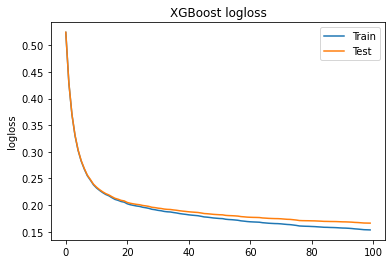

In [36]:
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)

fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('logloss')
plt.title('XGBoost logloss')
plt.show()